# PAP2 V234: Lichtquellen

In [1]:
#Module importieren: 
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import scipy.constants as sc

(250, 900)

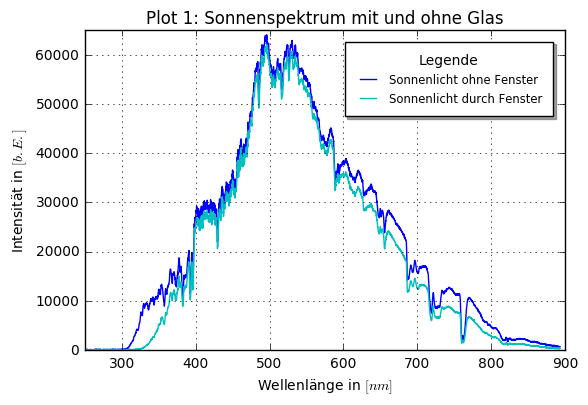

In [2]:
#Aufgabe 1: Sonnenspektrum mit und ohne Fenster

#Funktion um Komma durch Punkte in einzulesender Datei zu ersetzen: 
def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))

#Einlesen der Wellenlängen und Intensitäten von Himmelslicht
l1, i1=np.loadtxt('data/spec1_himmel.txt', skiprows=17, converters={0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

#Einlesen Sonnenlicht durch Fenster
l2, i2=np.loadtxt('data/spec2_fenster.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

#Auftragen der beiden Spektren in ein gemeinsames Diagramm: 
fig = plt.figure()
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.plot(l1, i1, label='Sonnenlicht ohne Fenster', color='b')
ax.plot(l2, i2, label='Sonnenlicht durch Fenster', color='c')
ax.set_xlabel(r"Wellenlänge in $[nm]$")
ax.set_ylabel(r"Intensität in $[b.E.]$")
ax.set_title("Plot 1: Sonnenspektrum mit und ohne Glas")
ax.legend(title="Legende", borderpad=1.0, borderaxespad=1, loc='best', shadow='true', fontsize='small')
ax.grid(True)
ax.set_ylim((0, 65000))
ax.set_xlim((250, 900))

#fig.savefig("v234_1.pdf", format="pdf")

(0, 1)

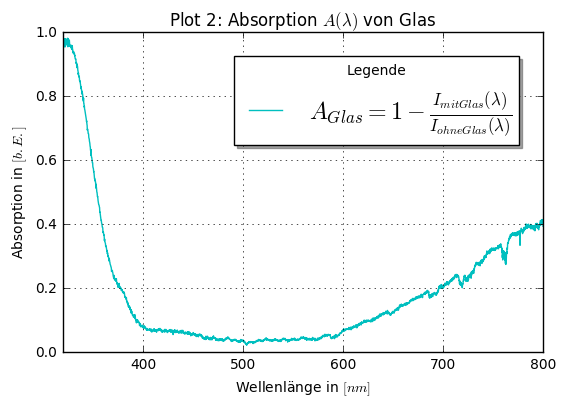

In [3]:
#Aufgabe 2: Absorption von Glas

#Absorption berechnen
A = 1-((i2/i1)) #Absorption Eins minus (mit Glas)/(ohne Glas)

#Plotten 
fig = plt.figure()
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.set_title("Plot 2: Absorption $A(\lambda)$ von Glas")
ax.plot(l2, A, label='$A_{Glas}=1-\\frac{I_{mit Glas}(\lambda)}{I_{ohne Glas}(\lambda)}$', color='c')

ax.set_xlabel(r"Wellenlänge in $[nm]$")
ax.set_ylabel(r"Absorption in $[b.E.]$")
ax.legend(title="Legende", borderpad=0.30, borderaxespad=1, loc='best', shadow='true', fontsize='xx-large')
ax.grid(True)
ax.set_xlim((320, 800))
ax.set_ylim((0, 1))


#fig.savefig("v234_2.pdf", format="pdf")

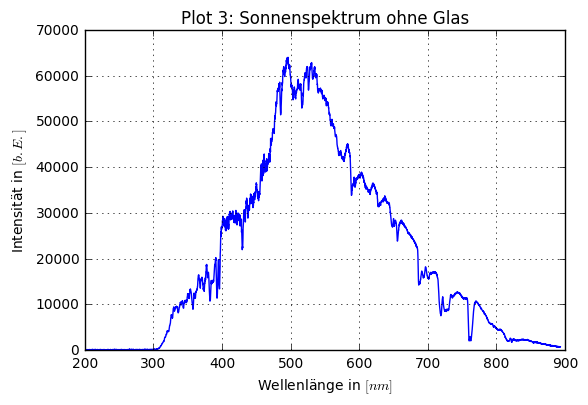

In [6]:
#Aufgabe 3: Fraunhofer 

import matplotlib.pyplot as plt 
import numpy as np
import scipy.constants as sc

#l = np.linspace(100e-9, 900e-9, 10000)
#def planck(l, T):
#    return (2*np.pi*sc.h*sc.c**2)/(l**5)*(1/(np.exp((sc.h*sc.c)/(T*l*sc.k))-1))

#Plotten 
fig = plt.figure()
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.set_title("Plot 3: Sonnenspektrum ohne Glas")
ax.plot(l1, i1, label='Sonnenspektrum', color='b')
ax.set_xlabel(r"Wellenlänge in $[nm]$")
ax.set_ylabel(r"Intensität in $[b.E.]$")
ax.grid(True)
ax.set_xlim((200, 900))
ax.set_ylim((0, 70000))

#fig.savefig("v234_3.pdf", format="pdf")

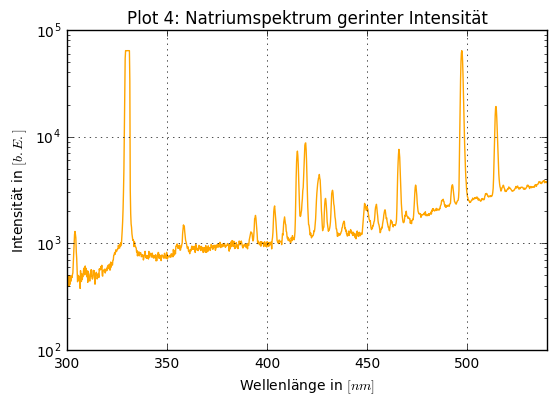

In [24]:
#Aufgabe 4: Natriumspektrum 

#Funktion um Komma durch Punkte in einzulesender Datei zu ersetzen: 
def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))

#Einlesen der Wellenlängen und Intensitäten von Natrium kleiner Intensitäten
l3, i3=np.loadtxt('data/spec81_Natrium_klein_400_bis_540.txt', skiprows=17, converters={0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

#Plotten 
fig = plt.figure()
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.set_title("Plot 4: Natriumspektrum gerinter Intensität")
ax.plot(l3, i3, color='orange')
ax.set_xlabel(r"Wellenlänge in $[nm]$")
ax.set_ylabel(r"Intensität in $[b.E.]$")
ax.set_xlim((300, 540))
ax.set_ylim((100, 100000))
ax.set_yscale('log')
ax.grid(True)

#fig.savefig("v234_4.pdf", format="pdf")

In [23]:
#Nebenserie: Berechnung der erwarteten Wellenlängen

for m in range(3,13):
    l=1.2398E3/(-13.605/m**2-E_3p)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))

In [5]:
# Korrekturfaktoren

wellenl=np.array([819.1,569.9,499.5,468.3,451.3, 441,434.8,431.6,428.3,421.4])
fehler=np.array([2,1,1,1,1,1,1,1,1,2]) 
quantenz=np.arange(3,13)

plt.errorbar(quantenz,wellenl,fehler, fmt=".") 
plt.xlabel("Quantenzahl")
plt.ylabel(r"Wellenlänge in $[nm]$")
plt.title(’1. Nebenserie des Na-Atoms’)

from scipy.optimize import curve_fit 
def fit_func(m,E_Ry,E_3p,D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

para = [-13.6,-3,-0.02]
popt, pcov = curve_fit(fit_func, quantenz, wellenl,sigma=fehler ,p0=para)

print("E_Ry=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0])) 
print("E_3p=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1])) 
print("D_d=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))

chi2_=np.sum((fit_func(quantenz,*popt)-wellenl)**2/fehler**2) dof=len(quantenz)-3 #dof:degrees of freedom, Freiheitsgrad chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)